### Ezinne Okechukwu || Data Analyst || adahacos@gmail.com

### Quantium Job Simulation || Task 3 Visualization (PPT REPORT)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('QVI_data.csv')
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
#view columns
df.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER'],
      dtype='object')

In [4]:
# rename the premium_customer column to affluence
df['Affluence Level'] = df['PREMIUM_CUSTOMER']
# convert lifestage strings to title case
df['LIFESTAGE'] = df['LIFESTAGE'].str.title()
# convert brand column to title case
df['BRAND'] = df['BRAND'].str.title()

In [23]:
# group brand by customer affluence
brand_affluence = df.groupby(['BRAND', 'Affluence Level'])['TOT_SALES'].sum().unstack()
# sorting stacked table by sum of the brand rows
brand_affluence.head()

Affluence Level,Budget,Mainstream,Premium
BRAND,,,
Burger,2527.7,2392.0,1911.3
Ccs,6657.0,6507.9,4914.0
Cheetos,6071.6,6374.1,4438.8
Cheezels,13983.9,15303.3,10742.7
Cobs,23780.4,28363.2,18426.2


Text(0, 0.5, '')

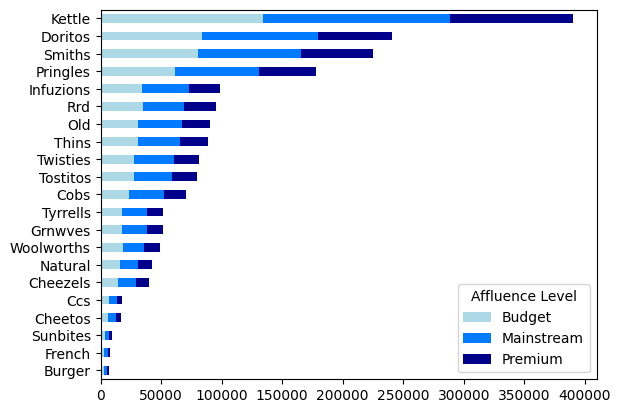

In [6]:
#sort brand_affluence
brand_affluence = brand_affluence.loc[brand_affluence.sum(axis=1).sort_values(ascending= True).index]

# visualize the resulting table
brand_affluence.plot(kind = 'barh', stacked = True, color = ['#ADD8E6', '#007BFF', '#00008B'])
plt.ylabel('')

In [7]:
# group df by lifestage and affluence level
lifestage_premium = df.groupby(['LIFESTAGE', 'Affluence Level'])['TOT_SALES'].sum().unstack()
lifestage_premium.sort_values(by = 'Budget', ascending= False)
lifestage_premium

Affluence Level,Budget,Mainstream,Premium
LIFESTAGE,,,
Midage Singles/Couples,35514.80,90803.85,58432.65
New Families,21928.45,17013.90,11491.10
Older Families,168363.25,103445.55,80658.40
Older Singles/Couples,136769.80,133393.80,132263.15
Retirees,113147.80,155677.05,97646.05
Young Families,139345.85,92788.75,84025.50
Young Singles/Couples,61141.60,157621.60,41642.10


In [8]:
# sorting stacked table by sum of the lifestage rows
lifestage_premium = lifestage_premium.loc[lifestage_premium.sum(axis=1).sort_values(ascending= True).index]
lifestage_premium

Affluence Level,Budget,Mainstream,Premium
LIFESTAGE,,,
New Families,21928.45,17013.90,11491.10
Midage Singles/Couples,35514.80,90803.85,58432.65
Young Singles/Couples,61141.60,157621.60,41642.10
Young Families,139345.85,92788.75,84025.50
Older Families,168363.25,103445.55,80658.40
Retirees,113147.80,155677.05,97646.05
Older Singles/Couples,136769.80,133393.80,132263.15


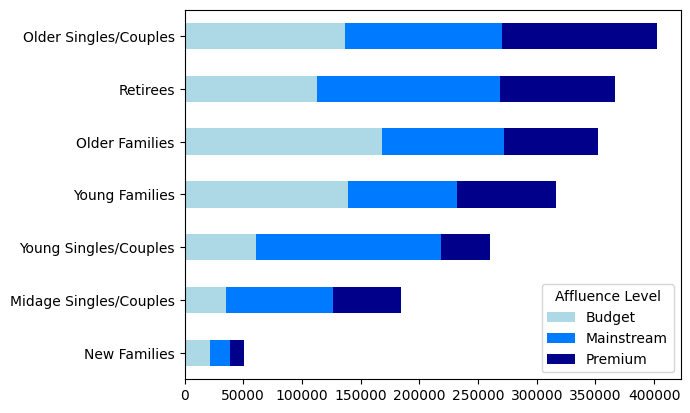

In [9]:
#visualize total sales by lifestage and premium group
lifestage_premium.plot(kind = 'barh', stacked = True, color = ['#ADD8E6', '#007BFF', '#00008B'])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [10]:
df['DATE'] = pd.to_datetime(df['DATE'])
# create a month column
df['MONTH'] = df['DATE'].dt.to_period('M')

start_date = '02-01-2019' #MM-DD-YYYY format
end_date = '05-31-2019'

In [16]:
# create a new column grouping the stores into 'trial store', 'control store' and 'other stores'
df['STORE_TYPE'] = 'Other Stores'
df.loc[df['STORE_NBR'].isin([71, 155, 134]), 'STORE_TYPE'] = 'Control Stores'
df.loc[df['STORE_NBR'].isin([77, 86, 88]), 'STORE_TYPE'] = 'Trial Stores'
df['STORE_TYPE'].unique()

array(['Other Stores', 'Control Stores', 'Trial Stores'], dtype=object)

In [42]:
data = df.groupby(['STORE_TYPE', 'MONTH']).agg({
    'TOT_SALES': 'sum',
    'LYLTY_CARD_NBR': 'nunique',
    'STORE_NBR': 'nunique'
}).rename(columns={'STORE_NBR': 'STORE_COUNT', 'TOT_SALES': 'AMOUNT'}).reset_index()

data['AVG_SALES'] = data['AMOUNT']/data['STORE_COUNT']
data['AVG_CUST'] = data['LYLTY_CARD_NBR']/data['STORE_COUNT']
data.head()

,STORE_TYPE,MONTH,AMOUNT,LYLTY_CARD_NBR,STORE_COUNT,AVG_SALES,AVG_CUST
0,Control Stores,2018-07,2442.40,262,3,814.133333,87.333333
1,Control Stores,2018-08,2187.45,246,3,729.150000,82.000000
2,Control Stores,2018-09,2358.00,252,3,786.000000,84.000000
3,Control Stores,2018-10,2298.40,256,3,766.133333,85.333333
4,Control Stores,2018-11,2326.60,252,3,775.533333,84.000000


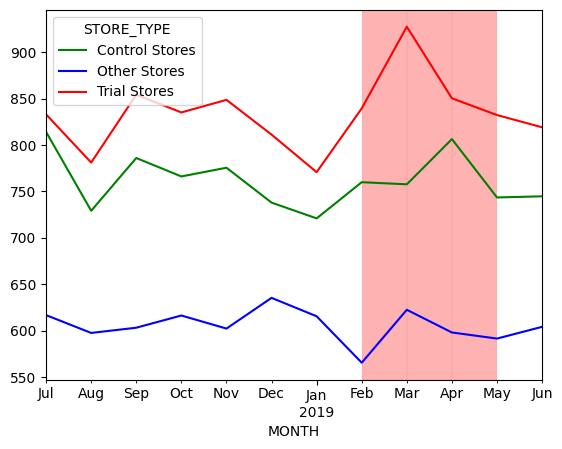

In [22]:
# evaluating total sales amongst the three store types
total_sales = data.pivot_table(index = 'MONTH', columns = 'STORE_TYPE', values = 'AVG_SALES')
total_sales.plot(color=['green', 'blue', 'red'])
months_to_shade = [('2019-02', '2019-03'), ('2019-03', '2019-04'), ('2019-04', '2019-05')]

for start, end in months_to_shade:
    plt.axvspan(start, end, color = 'red', alpha = 0.3, linewidth = 0.1)

plt.show()

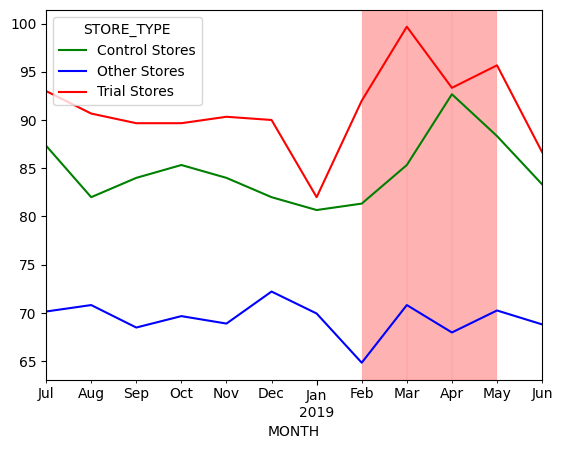

In [43]:
# evaluating total sales amongst the three store types
total_sales = data.pivot_table(index = 'MONTH', columns = 'STORE_TYPE', values = 'AVG_CUST')
total_sales.plot(color=['green', 'blue', 'red'])
months_to_shade = [('2019-02', '2019-03'), ('2019-03', '2019-04'), ('2019-04', '2019-05')]

for start, end in months_to_shade:
    plt.axvspan(start, end, color = 'red', alpha = 0.3, linewidth = 0.1)

plt.show()

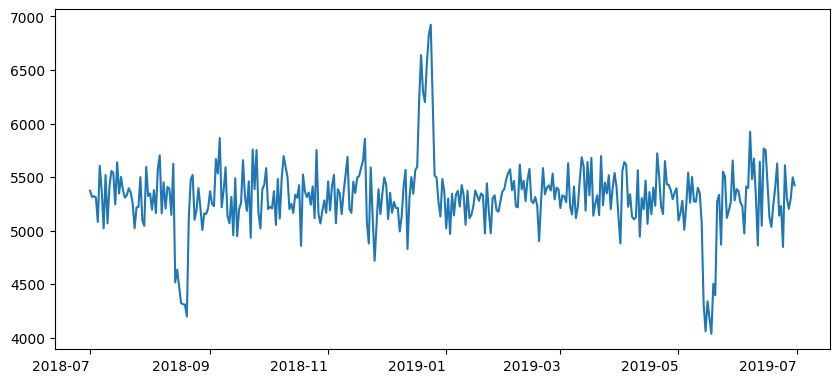

In [57]:
plt.figure(figsize=(10,5))
sales_trend = df.groupby('DATE')['TOT_SALES'].sum()
sales_trend.plot(x='DATE', y='TOT_SALES')
plt.xlabel('')
plt.xticks(rotation = 360)
plt.show()